In [152]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Численное интегрирование
$${f(x) = cos(x) - x * sin(x)}$$

In [153]:
def function(x):
    return math.cos(x) - x * math.sin(x)

def Rect_1(x, h):
    return function(x) * h

def Rect_2(x, h):
    return function(x + h) * h

def Rect_centr(x, h):
    return function((x + h + x) / 2) * h

def Tr(x, h):
    return (function(x + h) + function(x)) / 2 * h

def Simpson(x, h):
    return h * (function(x) + 4 * function((x + x + h) / 2) + function(x + h)) / 6

def Func(x):
    return x * math.cos(x)

In [187]:
#lets define h
n_left = 0.0
n_right = 2.0
h = [4/(2**i) for i in range(20)]

In [188]:
E_rec1 = []
E_rec2 = []
E_rec_cntr = []
E_tr = []
E_simps = []

In [189]:
k = 0
F_true = Func(n_right) - Func(n_left)
for j in range(20):
    h_opt = h[j]
    x_h = np.arange(n_left, n_right, h_opt)

    #левый прямоуг.
    F_rec1 = [Rect_1(x_h[i], h_opt) for i in range(len(x_h))]
    #правый прямоуг.
    F_rec2 = [Rect_2(x_h[i], h_opt) for i in range(len(x_h))]
    #central rec
    F_rec_cntr = [Rect_centr(x_h[i], h_opt) for i in range(len(x_h))]
    #trapeze
    F_tr = [Tr(x_h[i], h_opt) for i in range(len(x_h))]
    #Simpson
    F_simps = [Simpson(x_h[i], h_opt) for i in range(len(x_h))]

    E_rec1.append(abs(F_true - sum(F_rec1)))
    E_rec2.append(abs(F_true - sum(F_rec2)))
    E_rec_cntr.append(abs(F_true - sum(F_rec_cntr)))
    E_tr.append(abs(F_true - sum(F_tr)))
    E_simps.append(abs(F_true - sum(F_simps)))

In [194]:
#print(E_simps_res)
E = np.zeros(20)
h1 = np.zeros(20)
for i in range(20):
    E[i] = E_simps[i]
    h1[i] = h[i]

slope1, intercept1 = np.polyfit(np.log(h), np.log(E_rec1), 1)
slope2, intercept2 = np.polyfit(np.log(h), np.log(E_rec2), 1)
slope3, intercept3 = np.polyfit(np.log(h), np.log(E_rec_cntr), 1)
slope4, intercept4 = np.polyfit(np.log(h), np.log(E_tr), 1)
slope5, intercept5 = np.polyfit(np.log(h1[:14]), np.log(E[:14]), 1)

print("Наклон E_rec1(h):", slope1)
print("Наклон E_rec2(h):", slope2)
print("Наклон E_rec_cntr(h):", slope3)
print("Наклон E_tr(h):", slope4)
print("Наклон E_simps(h):", slope5)

Наклон E_rec1(h): 0.990027731957469
Наклон E_rec2(h): 1.0132507254731027
Наклон E_rec_cntr(h): 2.0595456335333973
Наклон E_tr(h): 2.040801675801057
Наклон E_simps(h): 4.015018081576174


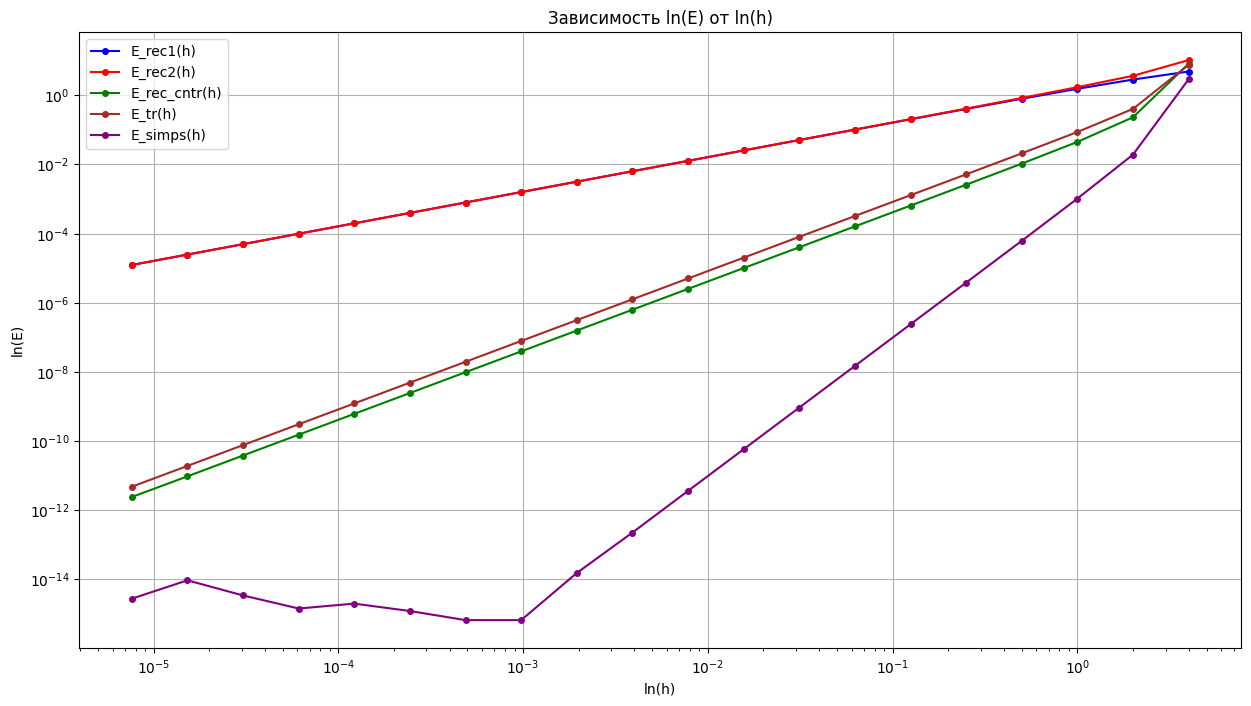

In [195]:
plt.figure(figsize=(15, 8))  # Размер графика

plt.loglog(h, E_rec1, label='E_rec1(h)', color='blue', marker = "o", markersize = 4)  # График функции 
plt.loglog(h, E_rec2, label='E_rec2(h)', color='red', marker = "o", markersize = 4)  # График функции 
plt.loglog(h, E_rec_cntr, label='E_rec_cntr(h)', color='green', marker = "o", markersize = 4)  # График функции 
plt.loglog(h, E_tr, label='E_tr(h)', color='brown', marker = "o", markersize = 4)  # График функции a
plt.loglog(h1, E, label='E_simps(h)', color='purple', marker = "o", markersize = 4)  # График функции a

plt.xlabel('ln(h)')
plt.ylabel('ln(E)')
plt.title('Зависимость ln(E) от ln(h)')  # Заголовок графика
plt.legend()
plt.grid(True)  # Отображаем сетку


plt.show()  # Отображаем график

### Несобственные интегралы
$$ f = e^{-x^2} $$

In [127]:
ff = lambda x: math.exp(-x * x)
a = 0
b = 10
k = 2
n = (b - a) // k
n += (n % 2 == 0)
b = a + k * (n - 1)
x = np.zeros(n)
y = np.zeros(n)
for i in range(n):
    x[i] = a + k * i
for i in range(len(x)):
    y[i] = ff(x[i])

def trap(n, y, k, step = 1):
    sum = 0
    for i in range(0,  n - 1, step):
        sum += y[i] + y[i + step]
    return sum * k * step / 2

A = trap(n, y, k)
T = math.sqrt(math.pi) / 2
print("Подсчитанное значение =", A)
print("Истинное значение =", T)
print("Погрешность =", math.fabs(A - T))

Подсчитанное значение = 1.0366315028478184
Истинное значение = 0.8862269254527579
Погрешность = 0.1504045773950604
